In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as dates
import calplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df_all = pd.read_csv('final_data_all_features.csv')
df_fil = pd.read_csv('final_data_filtered_feat.csv')

In [3]:
def get_train_test(df,date='2019-09-09'):
    df['Date_label']= pd.to_datetime(df['Date_label'])
    test_df = df[df['Date_label'] >= date]
    train_df = df[df['Date_label'] < date]
    print(test_df.shape,train_df.shape)
    X_train, y_train = train_df.drop(['Date_label','sum_QTY_label'],axis=1), train_df['sum_QTY_label']
    X_test, y_test = test_df.drop(['Date_label','sum_QTY_label'],axis=1), test_df['sum_QTY_label']
    return (X_train,y_train),(X_test, y_test),(train_df,test_df)

In [4]:
def plot_predictions(X_test,test_df,df,model):
    predictions = model.predict(X_test)
    test_df = test_df.reset_index().drop('index', axis=1)
    test_df['predictions'] = pd.Series(predictions)
    times = pd.date_range(start='2018-01-11',end='2019-12-31',freq='M')
    plt.figure(figsize=(20, 5))
    plt.plot(df.Date_label, df.sum_QTY_label)
    plt.plot(test_df.Date_label, test_df.predictions,color='red')
    plt.xticks(times,rotation=90)
    plt.show()

# ADABOOST

In [5]:
from sklearn.ensemble import AdaBoostRegressor

In [6]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_all)

(53, 42) (199, 42)


In [7]:
ada = AdaBoostRegressor(n_estimators=500)
ada.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=500)

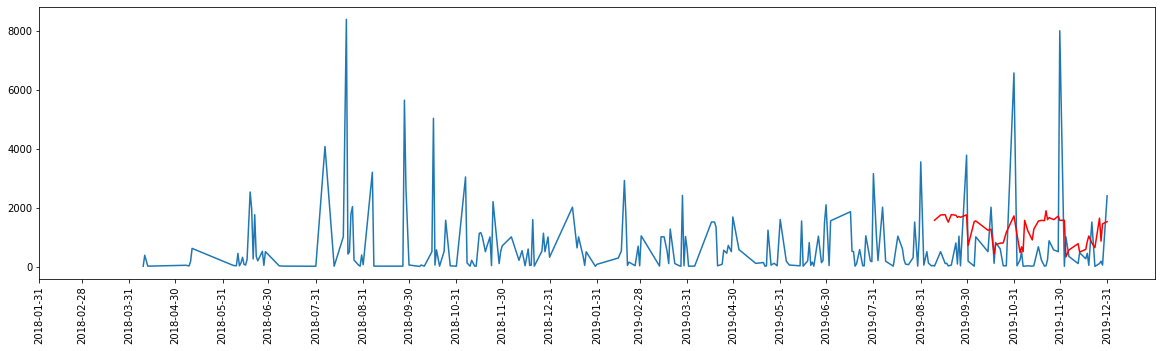

In [8]:
plot_predictions(X_test,test_df,df=df_all,model=ada)

In [10]:
(X_train,y_train),(X_test, y_test),(_,test_df) = get_train_test(df_fil)

(53, 12) (199, 12)


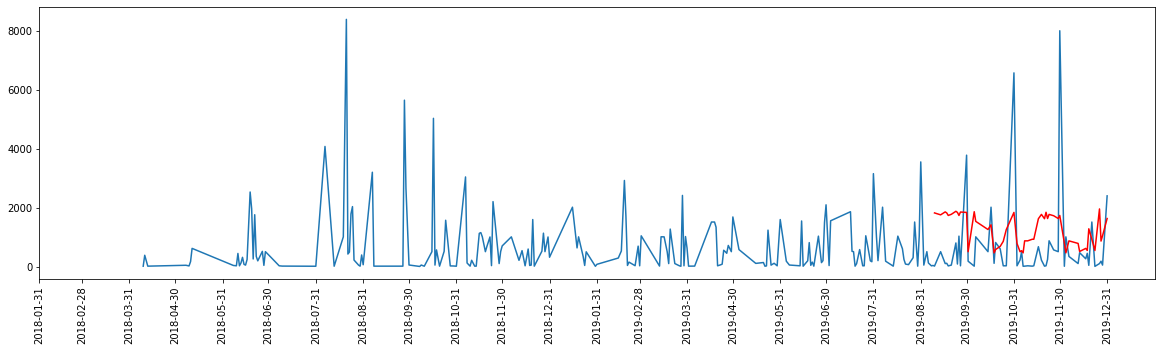

In [12]:
ada = AdaBoostRegressor(n_estimators=500)
ada.fit(X_train,y_train)
plot_predictions(X_test,test_df,df=df_fil,model=ada)

# RANDOMFOREST

In [14]:
from sklearn.ensemble import RandomForestRegressor

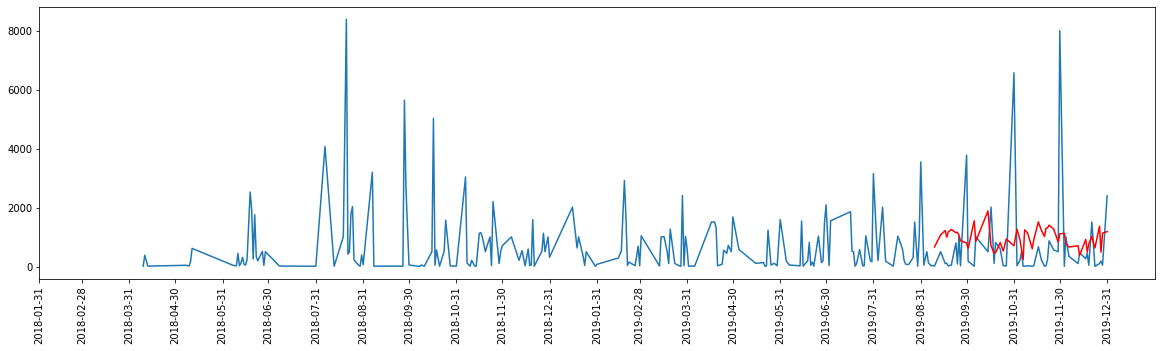

In [15]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
plot_predictions(X_test,test_df,df=df_all,model=rf)

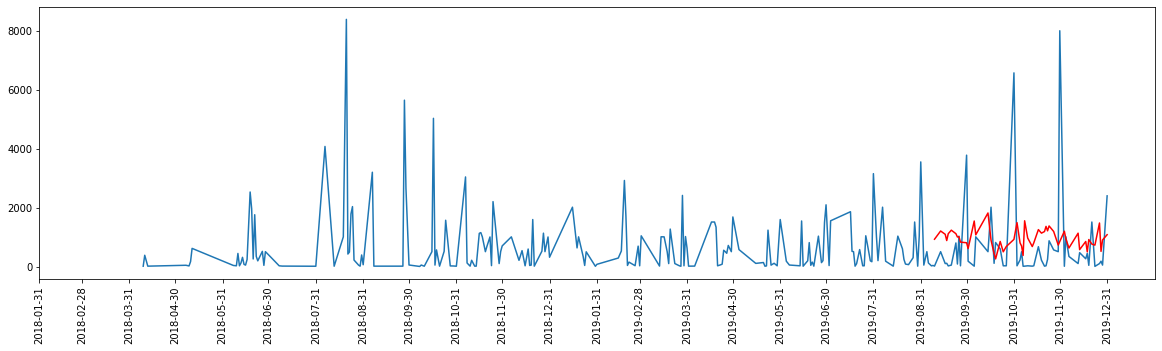

In [16]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
plot_predictions(X_test,test_df,df=df_fil,model=rf)